In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from dms_3d_features.plotting import plot_pop_avg_from_row, publication_style_ax

In [45]:
DATA_PATH = "../data"

In [46]:
df = pd.read_json(f"{DATA_PATH}/raw-jsons/constructs/pdb_library_1_combined.json")
df_motif = pd.read_json(f"{DATA_PATH}/raw-jsons/motifs/pdb_library_1_motifs_standard.json")
df_residue = pd.read_json(f"{DATA_PATH}/raw-jsons/residues/pdb_library_1_residues.json")

## general library stats

### size

<Axes: >

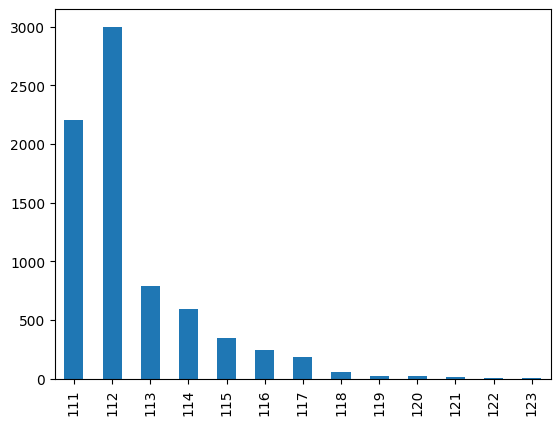

In [47]:
df["len"] = df["sequence"].apply(len)
df["len"].value_counts().sort_index().plot(kind="bar")

### are any constructs do not have enough reads

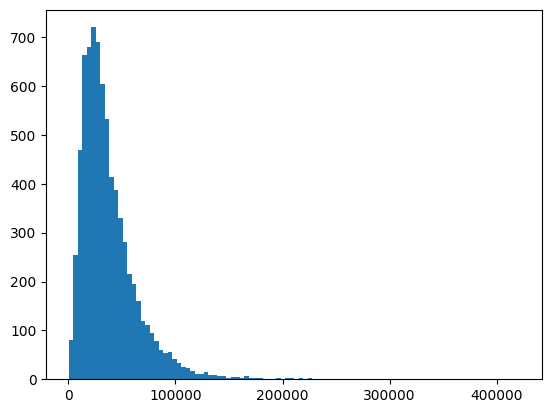

In [48]:
plt.hist(df["num_aligned"], bins=100);

In [49]:
df = df.sort_values("num_aligned", ascending=True)
df.iloc[0]

name                                               construct3563
sequence       AAUUAGUGAAGUCGUACCUGCAGGUUCUAACGCAUAAAUACCAAGA...
structure      .((((..(((((..(((((...(((((..(((((..(((((...((...
data           [0.00893, 0.0029800000000000004, 0.0, 0.002980...
sn                                                         15.03
num_reads                                                    375
num_aligned                                                  369
no_mut                                                     49.86
1_mut                                                      37.94
2_mut                                                      11.11
3_mut                                                       0.81
3plus_mut                                                    0.0
mfe                                                        -51.1
ens_defect                                                  1.24
len                                                          114
Name: 2813, dtype: object

In [50]:
print(df["num_aligned"].describe())

count      7500.000000
mean      37688.644133
std       26941.748951
min         369.000000
25%       19796.750000
50%       31129.000000
75%       48240.500000
max      421216.000000
Name: num_aligned, dtype: float64


In [51]:
print(len(df[df["num_aligned"] < 2000]))

13


<Axes: >

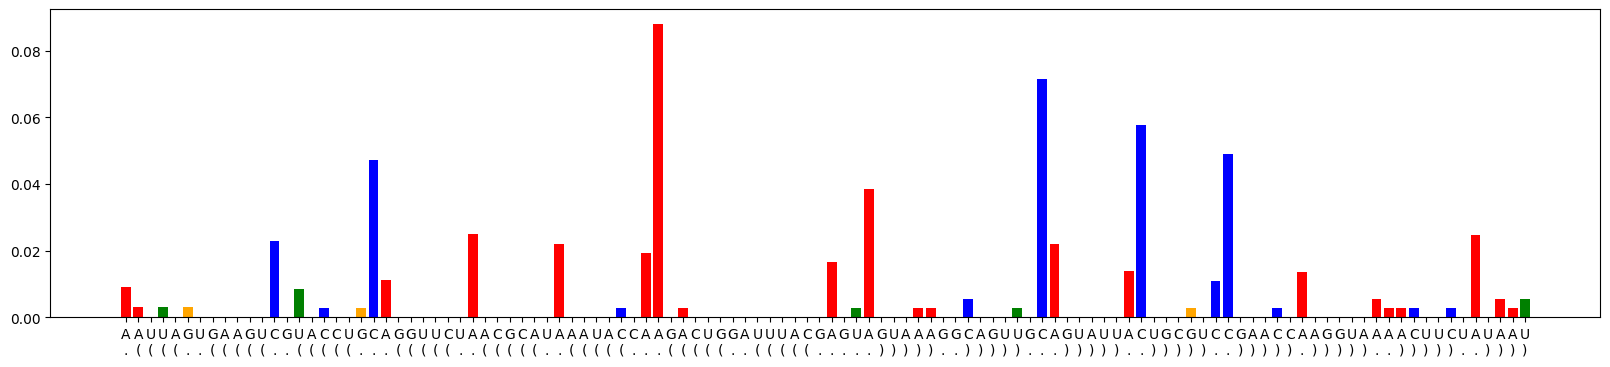

In [52]:
plot_pop_avg_from_row(df.iloc[0])

<Axes: >

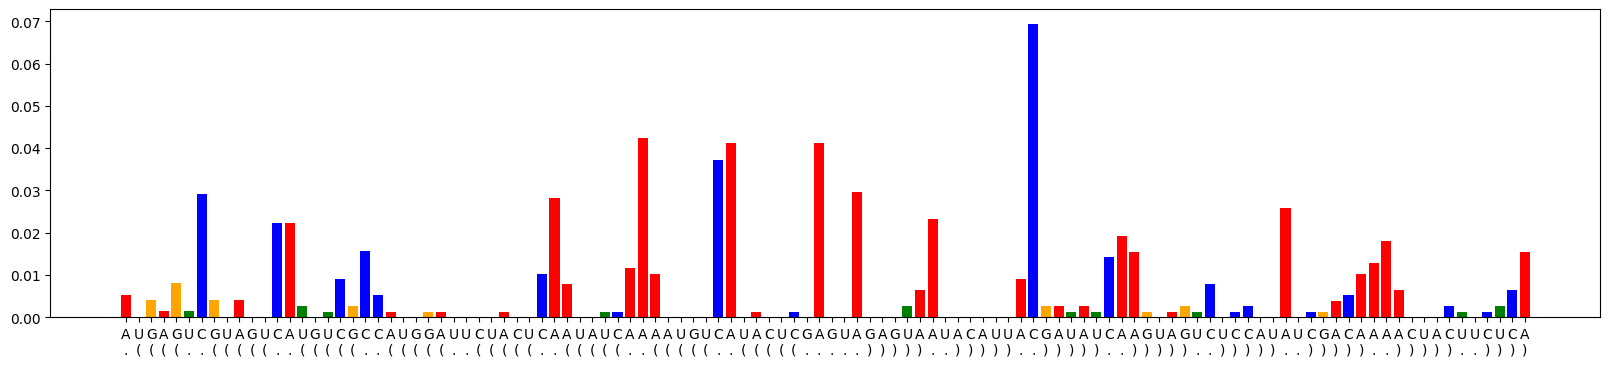

In [53]:
plot_pop_avg_from_row(df.iloc[1])

<Axes: >

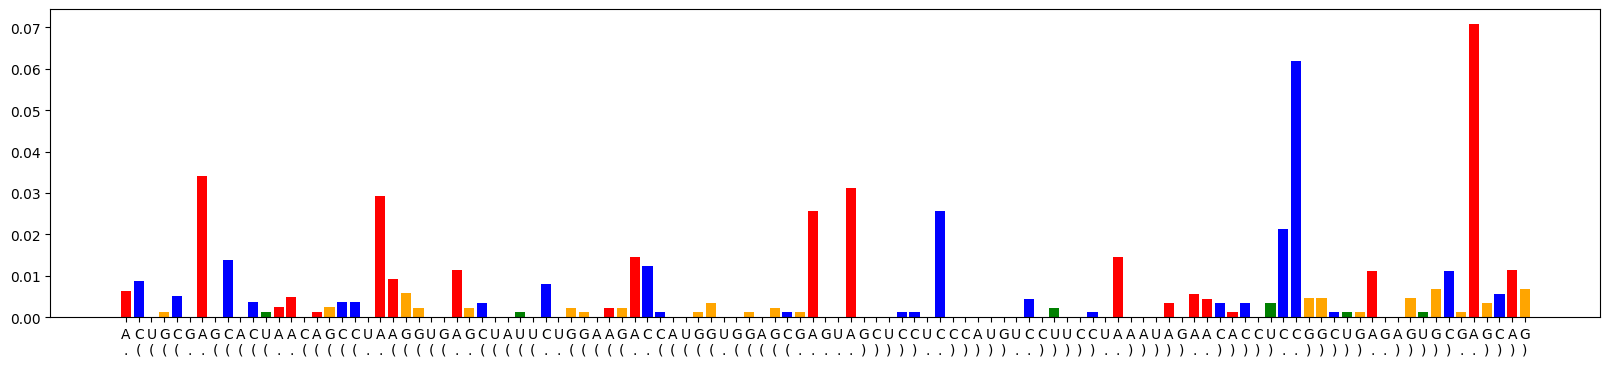

In [54]:
plot_pop_avg_from_row(df.iloc[2])

### low signal to noise

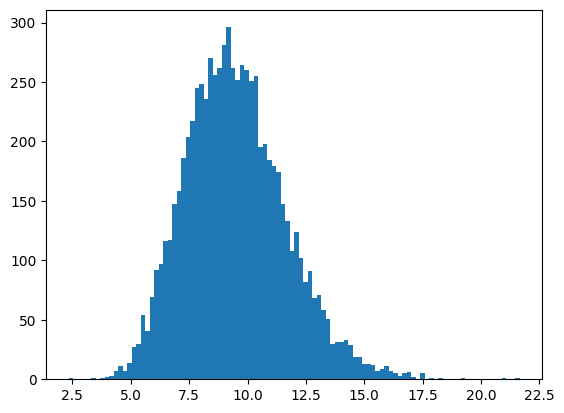

In [55]:
plt.hist(df["sn"], bins=100);

In [56]:
df = df.sort_values("sn", ascending=True)
df.iloc[0]

name                                                  construct3
sequence       AGCCAUUCCCUGUAAGUUGCUGGUUAGACUGAGACCCAGAUUAGGA...
structure      .((((..(((((..(((((..(((((..(((((..(((((..((((...
data           [0.007770000000000001, 0.006, 0.01024, 0.00741...
sn                                                          2.34
num_reads                                                   2947
num_aligned                                                 2938
no_mut                                                     49.97
1_mut                                                       35.7
2_mut                                                      11.37
3_mut                                                       2.72
3plus_mut                                                   0.03
mfe                                                        -71.1
ens_defect                                                  0.19
len                                                          112
Name: 6003, dtype: object

<Axes: >

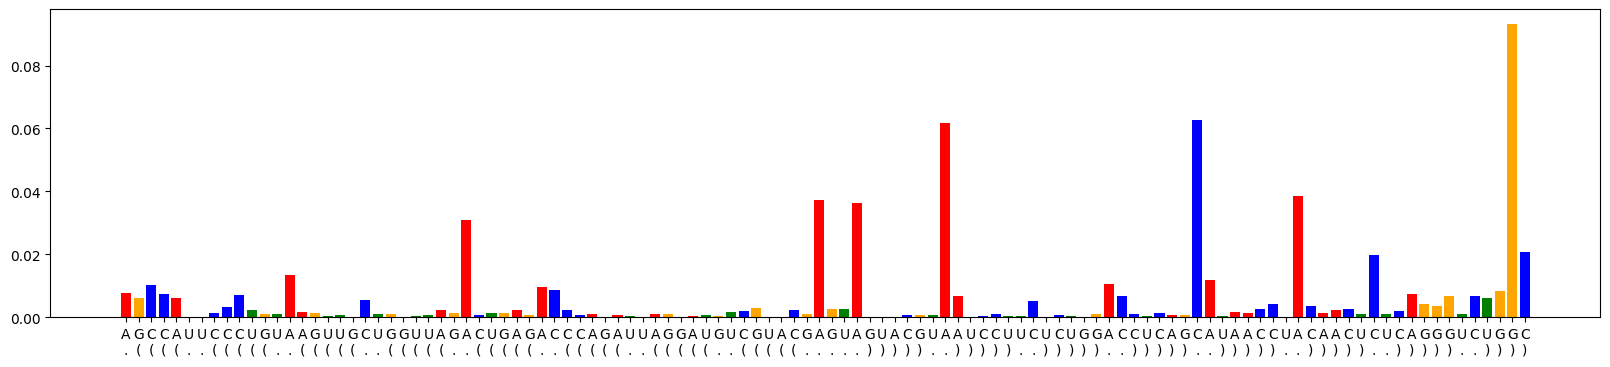

In [57]:
plot_pop_avg_from_row(df.iloc[0])

<Axes: >

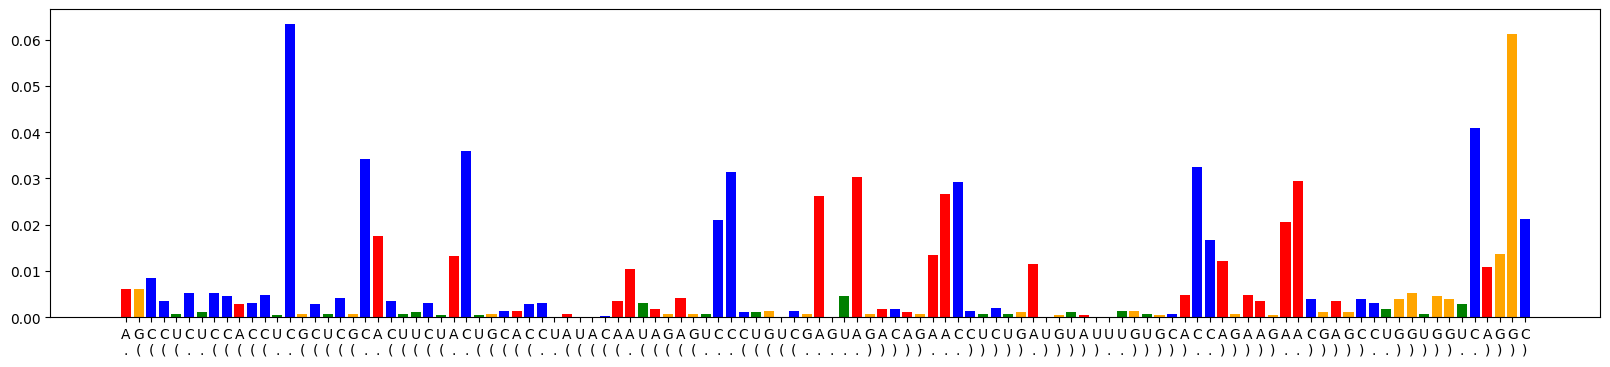

In [58]:
plot_pop_avg_from_row(df.iloc[1])

<Axes: >

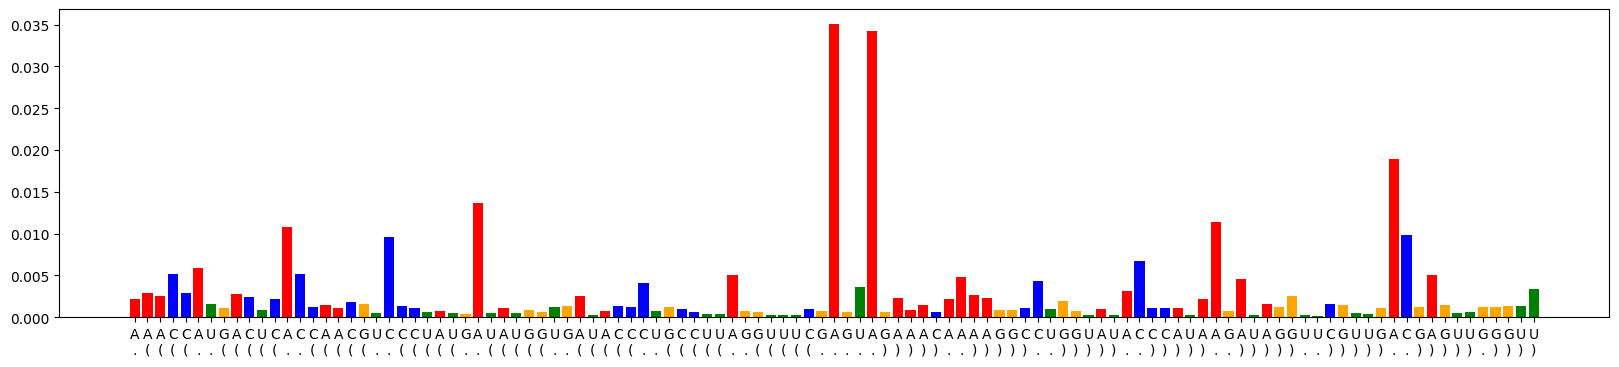

In [59]:
plot_pop_avg_from_row(df.iloc[2])

In [60]:
df = pd.read_json(f"{DATA_PATH}/raw-jsons/pdb_library_1_combined_motifs_res.json")

FileNotFoundError: File ../data/raw-jsons/pdb_library_1_combined_motifs_res.json does not exist

## Highest reactivity

In [ ]:
df["max_data"] = df["data"].apply(lambda x: max(x))  

In [ ]:
df = df.sort_values("max_data", ascending=False)
df.iloc[0]

name                                               construct3387
sequence       AACCUUAUAUUCAACUCUGGCUACGCAAUGUUUAAUUGUGAGGAGA...
structure      .((((..(((((.(((((..(((((..(((((..(((((...((((...
data           [0.004090000000000001, 0.0019, 0.0029000000000...
sn                                                         21.65
num_reads                                                  41143
num_aligned                                                41117
no_mut                                                     26.98
1_mut                                                      40.68
2_mut                                                       23.0
3_mut                                                       7.37
3plus_mut                                                   0.37
mfe                                                        -49.6
ens_defect                                                  1.19
max_data                                                 0.50069
Name: 2637, dtype: object

<Axes: >

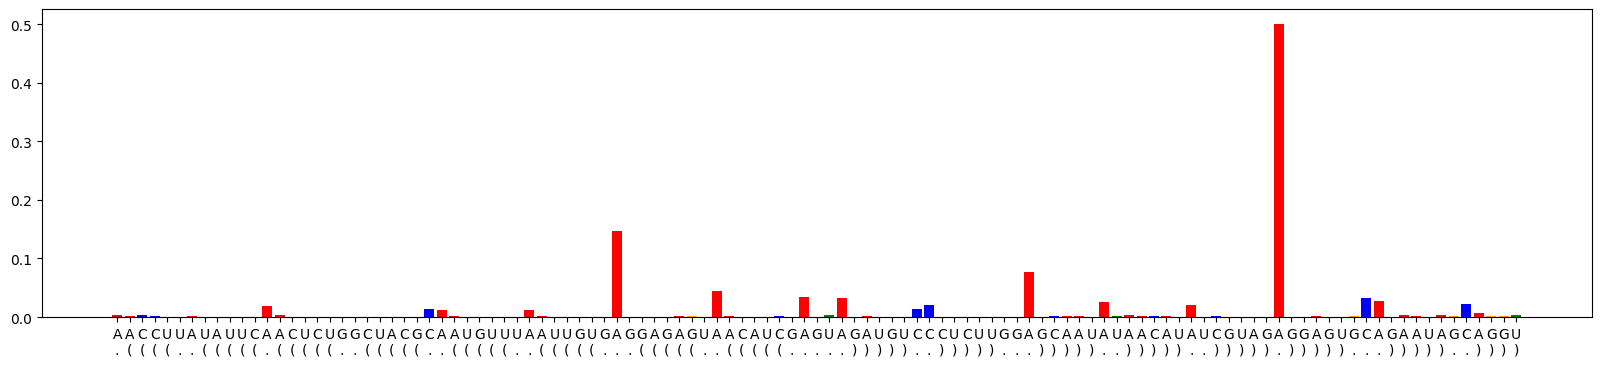

In [ ]:
plot_pop_avg_from_row(df.iloc[0])

<Axes: >

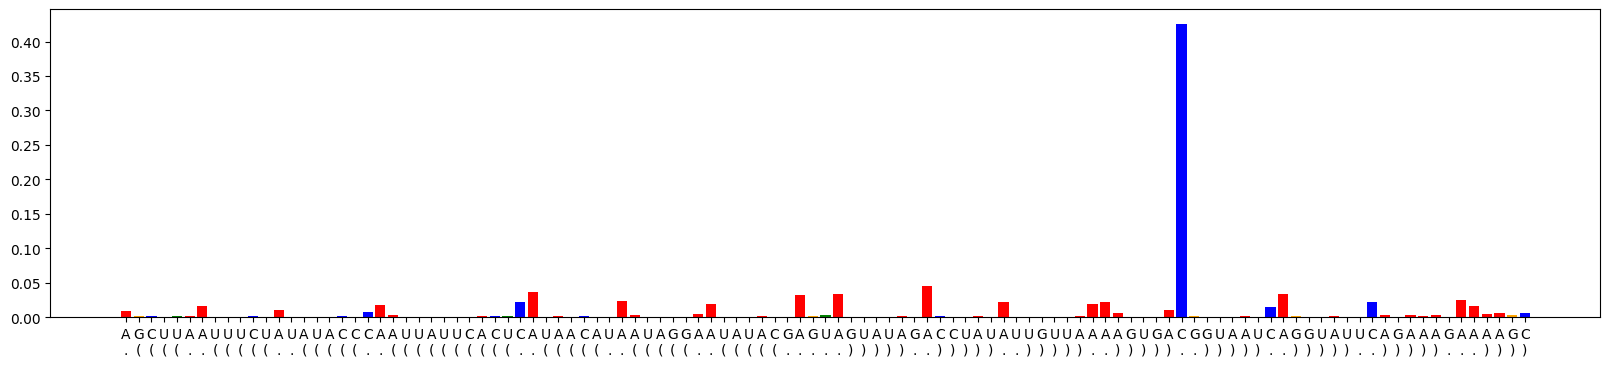

In [ ]:
plot_pop_avg_from_row(df.iloc[1])

<Axes: >

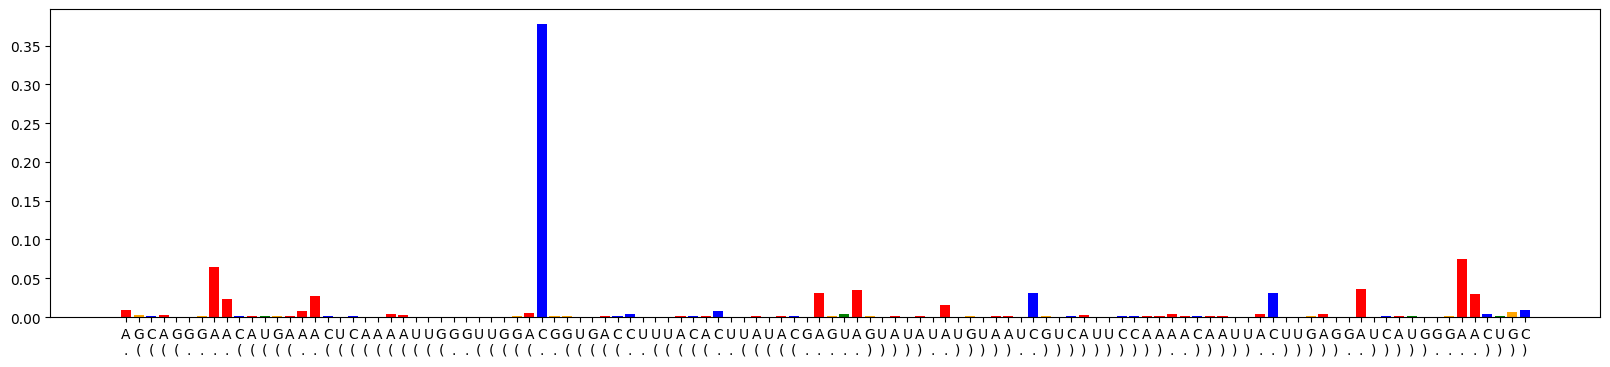

In [ ]:
plot_pop_avg_from_row(df.iloc[2])

<Axes: >

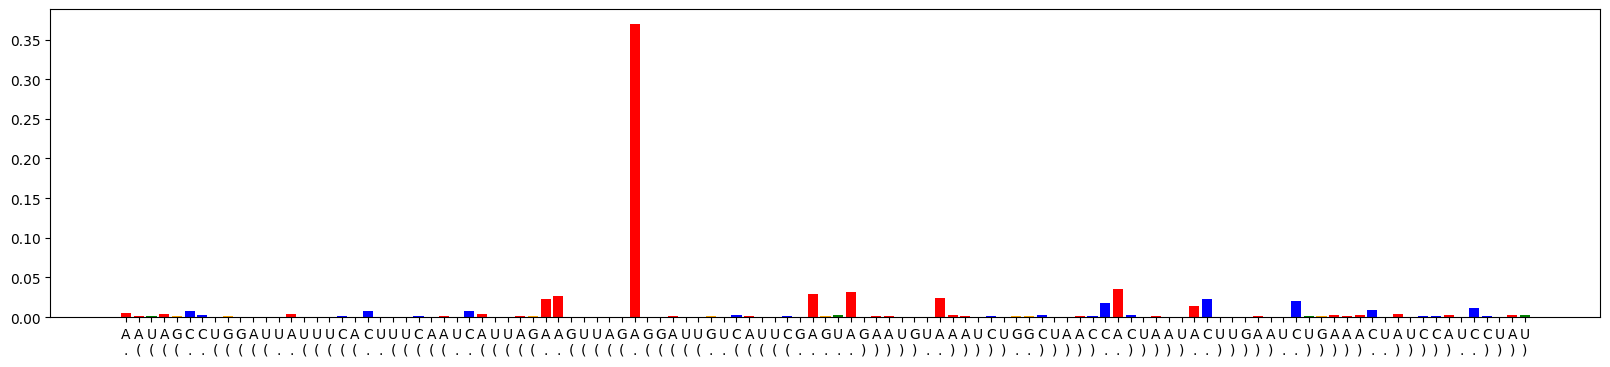

In [ ]:
plot_pop_avg_from_row(df.iloc[3])

## trends in reactivity

### all data

In [ ]:
m_data_array = np.array([data[-100:] for data in df["data"]])
m_data_avg = np.mean(m_data_array, axis=0)
m_data_std = np.std(m_data_array, axis=0)
m_data_cv = m_data_std / m_data_avg


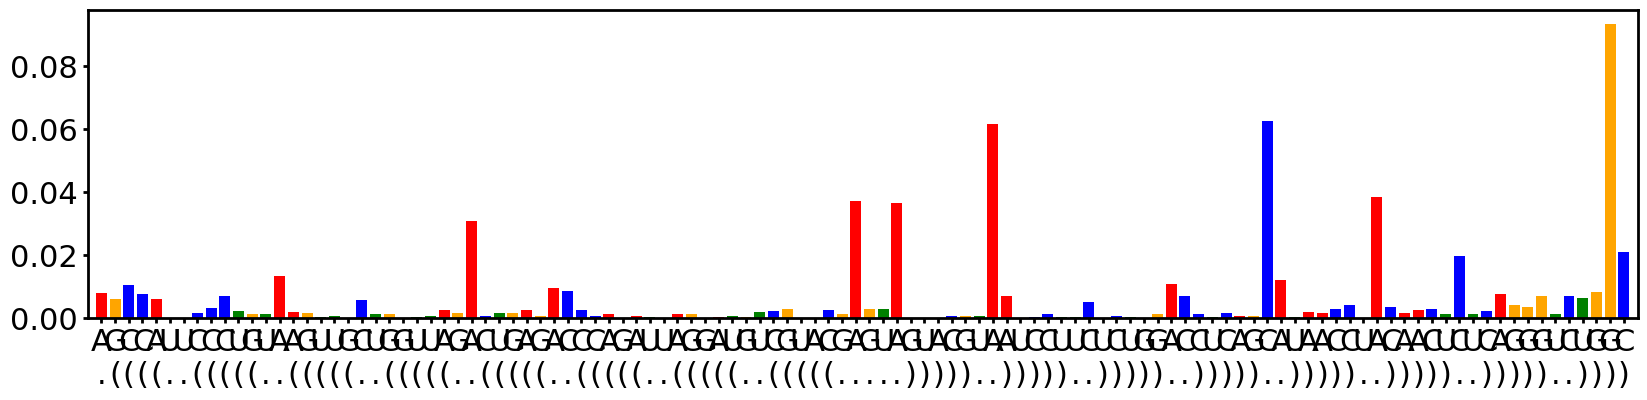

In [80]:
ax = plot_pop_avg_from_row(df.iloc[0])
ax.set_xlim(-1, 112)
publication_style_ax(ax)

In [79]:
print(df.iloc[1000]["sequence"])
print(df.iloc[1000]["structure"])

AACACGAGAACUCGCCUUGCUGGUUGUCACGGUUCCGCAUGAUACUGGCUCCUCGAGUAGAGGAUACAGUAAGAUGCGUCACCGUAUCAACCCUCAAGGAAAGUUCAAGUGU
.((((..(((((..(((((..(((((..(((((..(((((..(((((..(((((.....)))))..)))))..)))))..)))))..)))))..)))))..)))))..))))


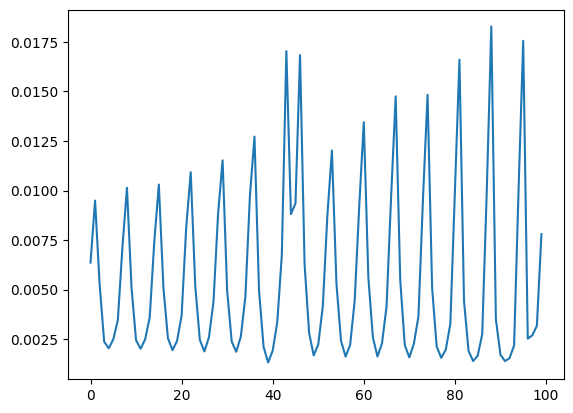

In [ ]:
plt.plot(m_data_avg)

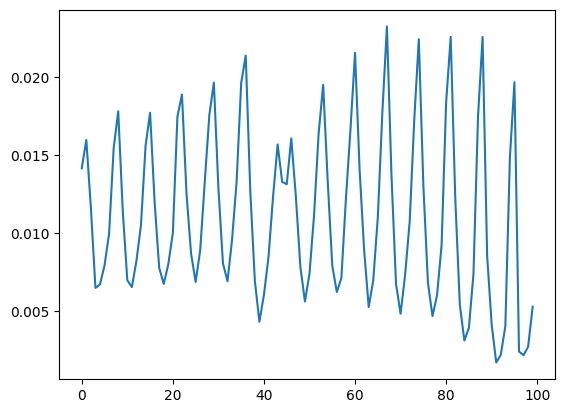

In [ ]:
plt.plot(m_data_std)

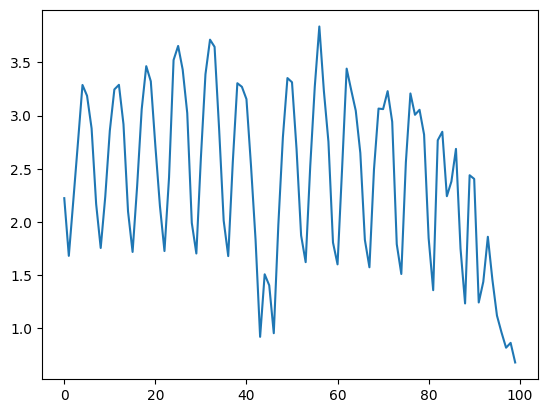

In [ ]:
plt.plot(m_data_cv)

### by num_aligned

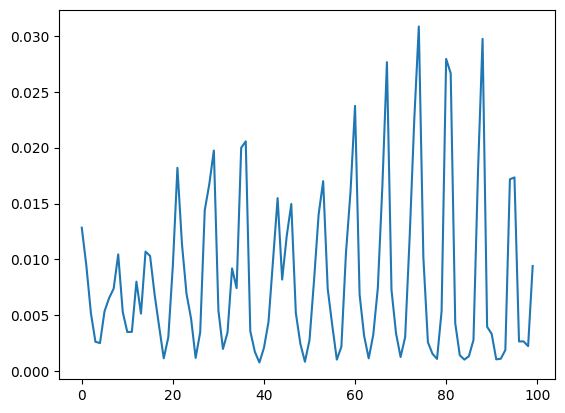

In [ ]:
df_sub = df[df["sn"] > 15]
m_data_array = np.array([data[-100:] for data in df_sub["data"]])
m_data_avg = np.mean(m_data_array, axis=0)
plt.plot(m_data_avg)

In [ ]:
df_seq = df_residue.query("m_sequence == 'AAAG&CGAU' and r_loc_pos == 1")
df_seq = df_seq.sort_values("r_data", ascending=False)

In [ ]:
df_seq.iloc[-1]

both_purine                      True
both_pyrimidine                 False
constructs              construct3323
has_pdbs                         True
likely_pair                        AA
m_flank_bp_5p                      AU
m_flank_bp_3p                      GC
m_orientation             non-flipped
m_pos                               2
m_second_flank_bp_5p               CG
m_second_flank_bp_3p               GC
m_sequence                  AAAG&CGAU
m_structure                 (..(&)..)
m_token                           2x2
n_pdbs                              1
pair_type                         NaN
p5_res                              A
p5_type                        PURINE
p3_res                              A
p3_type                        PURINE
r_data                        0.00291
r_nuc                               A
r_loc_pos                           1
r_pos                              19
r_type                         NON-WC
Name: 9476, dtype: object

<Axes: >

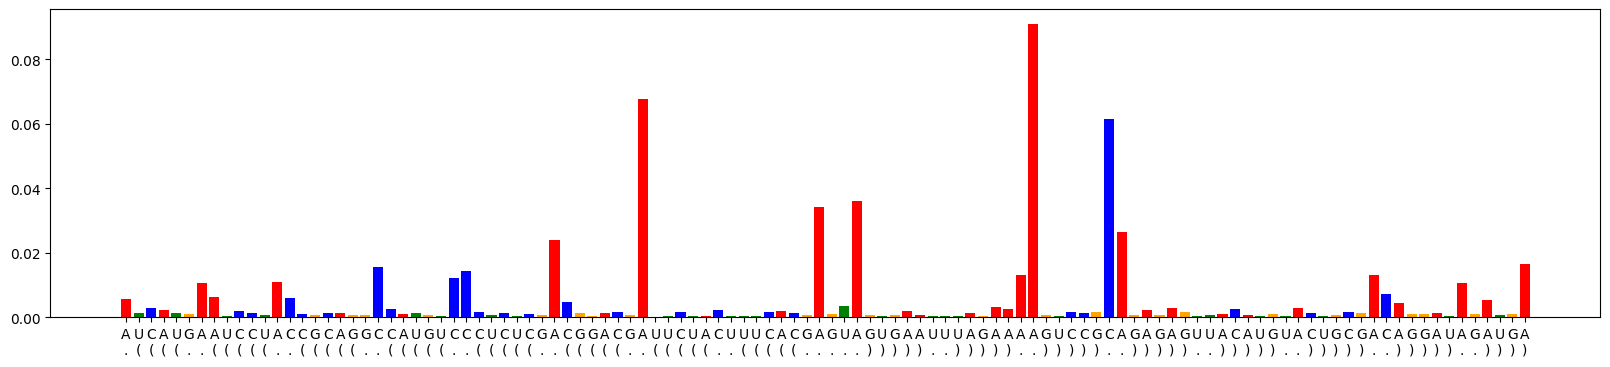

In [ ]:
plot_pop_avg_from_row(df.query('name == "construct809"').iloc[0])

<Axes: >

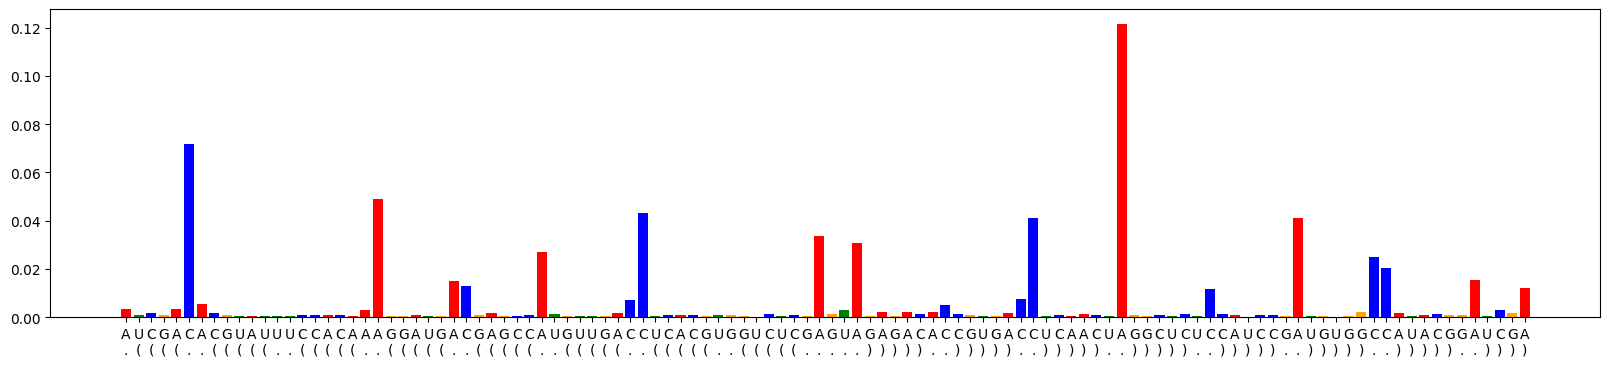

In [ ]:
plot_pop_avg_from_row(df.query('name == "construct3323"').iloc[0])